# Magic Dataset Visualisation Project from Free Code Camp ORG


### Importing the necessary libraries


In [11]:
%pip install --quiet --upgrade \
    pip \
    setuptools \
    wheel \
    pandas \
    numpy \
    matplotlib \
    scikit-learn \
    imblearn \
    https://storage.googleapis.com/tensorflow/versions/2.19.0/tensorflow_cpu-2.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Leading the dataset to the _panda_ dataframe

---

#### Dataset

- [URL](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)
- It is a open source, copy right free dataset which was actually the data of a **Gamma Telescope**, which captured the effects of gamma rays from the space via camera


In [13]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('data/magic.csv', names=cols)
df.head(5)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

Transforming the **Class** column so that if the class is == g then it will be represented as 1 otherwise 0, because our computer is good at remembering numbrs than characters


In [14]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

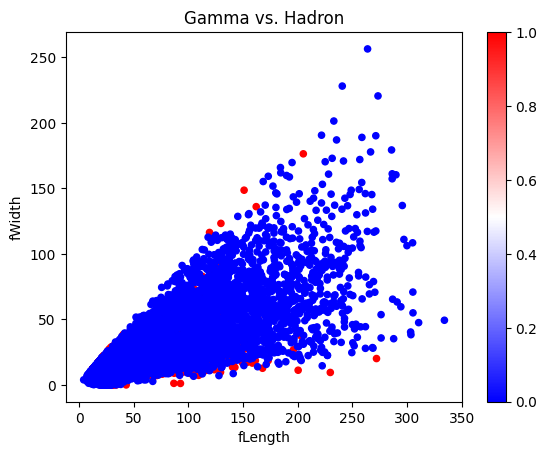

In [15]:
df.plot.scatter(x="fLength", y="fWidth", c=df["class"], cmap="bwr")
plt.title("Gamma vs. Hadron")
plt.xlabel("fLength")
plt.ylabel("fWidth")
plt.show()

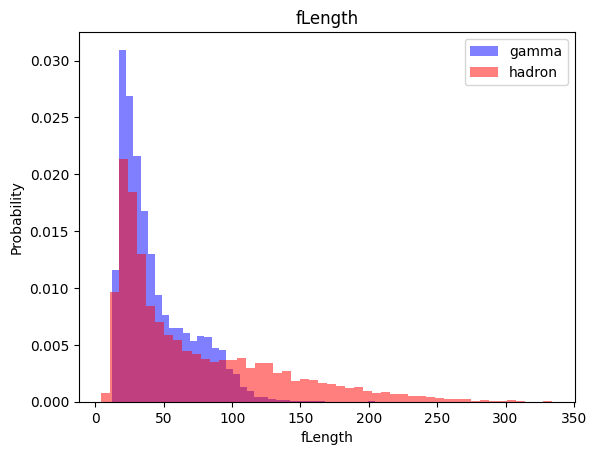

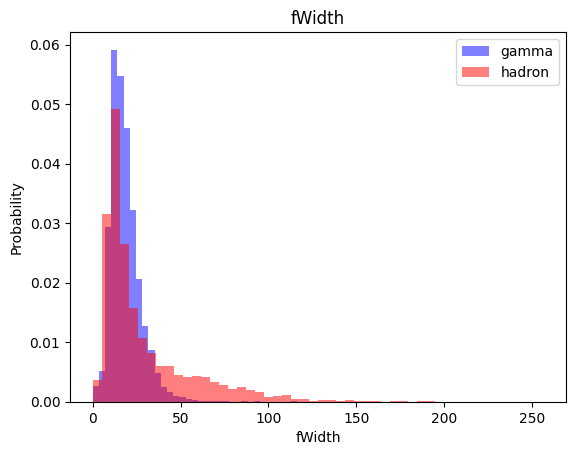

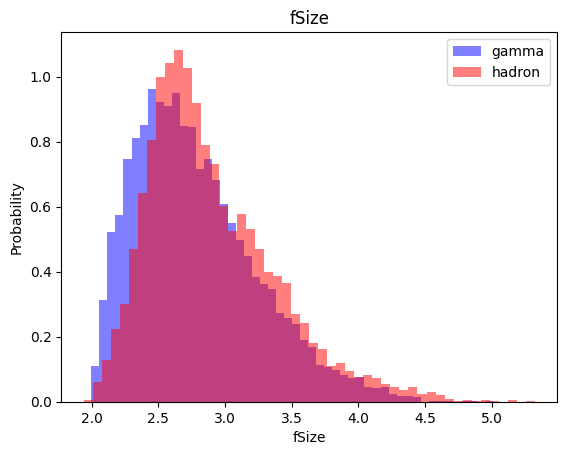

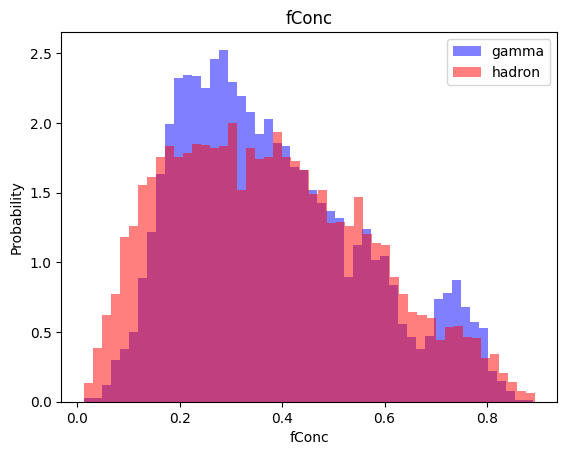

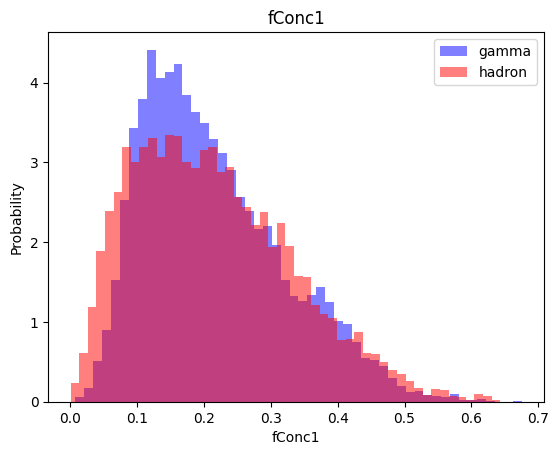

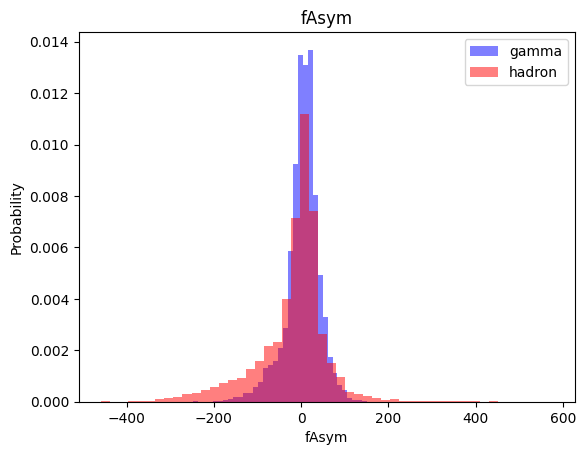

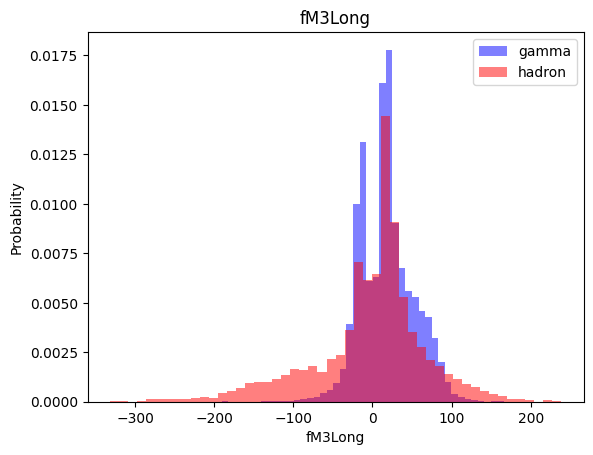

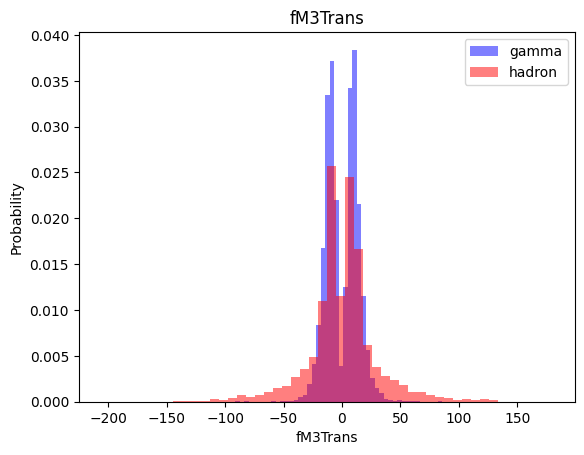

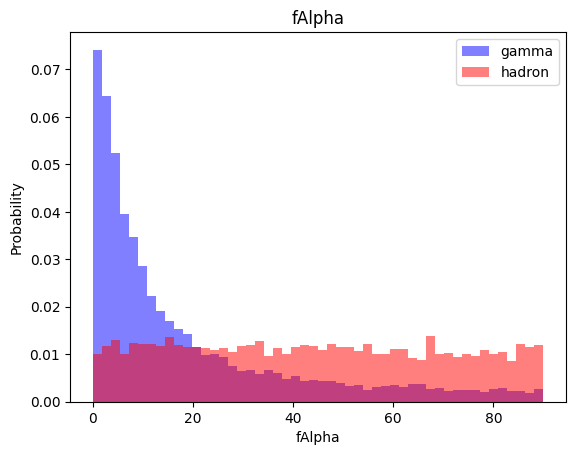

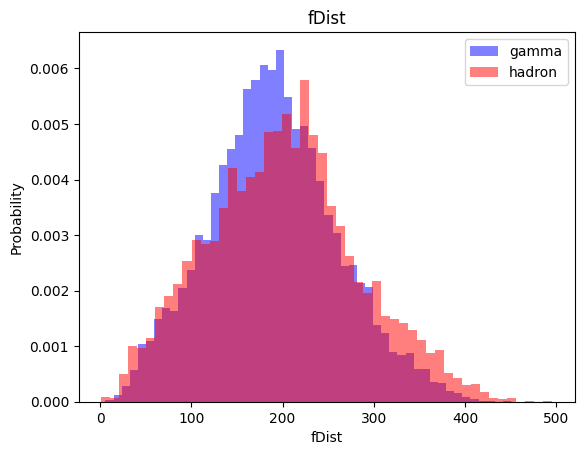

In [16]:
for l in cols[:-1]:
    plt.hist(df[df["class"] == 1][l], color="blue", label="gamma", alpha=0.5, density=True, bins=50)
    plt.hist(df[df["class"] == 0][l], color="red", label="hadron", alpha=0.5, density=True, bins=50)
    plt.legend()
    plt.title(l)
    plt.xlabel(l)
    plt.ylabel("Probability")
    plt.show()

In [17]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/home/piush/Prog/ml/magic-dataset-fcc/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()

    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        ros.fit_resample(X, Y)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    return data, X, Y

In [19]:
train, X_Train, Y_Train = scale_dataset(train, oversample=True)
valid, X_Valid, Y_Valid = scale_dataset(validation, oversample=False)
test, X_Test, Y_Test = scale_dataset(test, oversample=False)

### K-NN Implementation


In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_Train, Y_Train)
Y_Pred = knnModel.predict(X_Test)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix")
print(cm)
print(classification_report(Y_Test, y_pred=Y_Pred, target_names=["Hadron", "Gamma"]))

Confusion Matrix
[[ 846  512]
 [ 158 2288]]
              precision    recall  f1-score   support

      Hadron       0.84      0.62      0.72      1358
       Gamma       0.82      0.94      0.87      2446

    accuracy                           0.82      3804
   macro avg       0.83      0.78      0.79      3804
weighted avg       0.83      0.82      0.82      3804



In [22]:
print("Predictions")
Y_Pred

Predictions


array([1, 1, 1, ..., 0, 1, 1])

In [23]:
print("True Values")
Y_Test

True Values


array([1, 0, 1, ..., 0, 1, 1])

## Naive Bayes Implementation


In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model = nb_model.fit(X_Train, Y_Train)

Y_Pred = nb_model.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix")
print(cm)
print(classification_report(y_true=Y_Test, y_pred=Y_Pred, target_names=["Hadron", "Gamma"]))

Confusion Matrix
[[ 494  864]
 [ 206 2240]]
              precision    recall  f1-score   support

      Hadron       0.71      0.36      0.48      1358
       Gamma       0.72      0.92      0.81      2446

    accuracy                           0.72      3804
   macro avg       0.71      0.64      0.64      3804
weighted avg       0.72      0.72      0.69      3804



In [25]:
print("Predictions")
Y_Pred

Predictions


array([1, 1, 1, ..., 0, 0, 1])

In [26]:
print("True Values")
Y_Test

True Values


array([1, 0, 1, ..., 0, 1, 1])

## Logistic Regression Implementation


In [27]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model = log_model.fit(X_Train, Y_Train)

Y_Pred = log_model.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix")
print(cm)
print(classification_report(y_true=Y_Test, y_pred=Y_Pred, target_names=["Hadron", "Gamma"]))

Confusion Matrix
[[ 787  571]
 [ 243 2203]]
              precision    recall  f1-score   support

      Hadron       0.76      0.58      0.66      1358
       Gamma       0.79      0.90      0.84      2446

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804



In [28]:
print("Predictions")
Y_Pred

Predictions


array([1, 1, 1, ..., 0, 0, 1])

In [29]:
print("True Values")
Y_Test

True Values


array([1, 0, 1, ..., 0, 1, 1])

## SVM Implementation


In [30]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_Train, Y_Train)
Y_Pred = svm_model.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix")
print(cm)
print(classification_report(y_true=Y_Test, y_pred=Y_Pred, target_names=["Hadron", "Gamma"]))

Confusion Matrix
[[ 930  428]
 [ 103 2343]]
              precision    recall  f1-score   support

      Hadron       0.90      0.68      0.78      1358
       Gamma       0.85      0.96      0.90      2446

    accuracy                           0.86      3804
   macro avg       0.87      0.82      0.84      3804
weighted avg       0.87      0.86      0.86      3804



In [31]:
print("Predictions")
Y_Pred

Predictions


array([1, 1, 1, ..., 0, 1, 1])

In [32]:
print("True Values")
Y_Test

True Values


array([1, 0, 1, ..., 0, 1, 1])

## Neural Network Implementation (Tensorflow)


In [38]:
import tensorflow as tf

In [58]:
def plot_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(history.history['accuracy'], label="Accuracy")
    ax1.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    ax1.grid(True)

    ax2.plot(history.history['loss'], label="Loss")
    ax2.plot(history.history['val_loss'], label="Validation Loss")
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')
    ax2.grid(True)

    plt.show()


In [59]:
def TrainModel(X_Train, Y_Train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(
        X_Train,
        Y_Train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0,
    )

    return nn_model, history

/home/piush/Prog/ml/magic-dataset-fcc/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


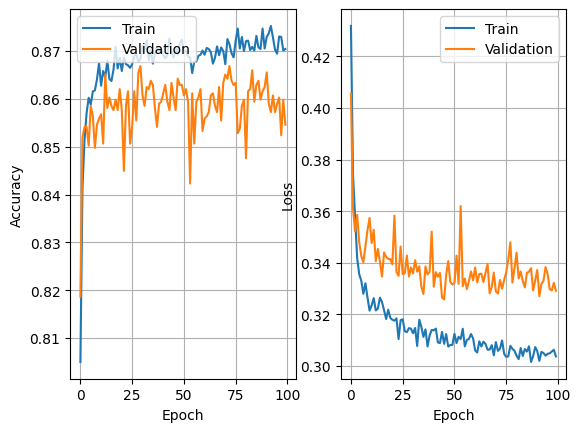

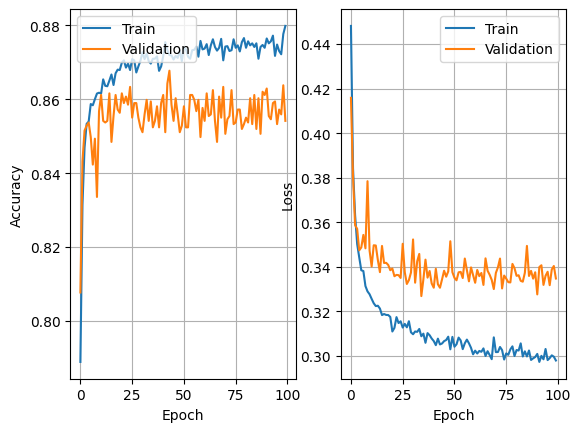

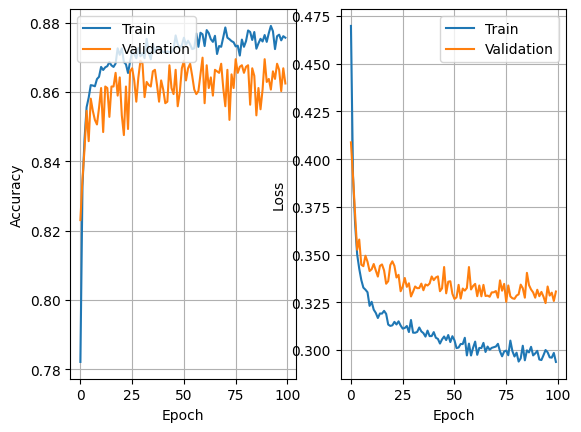

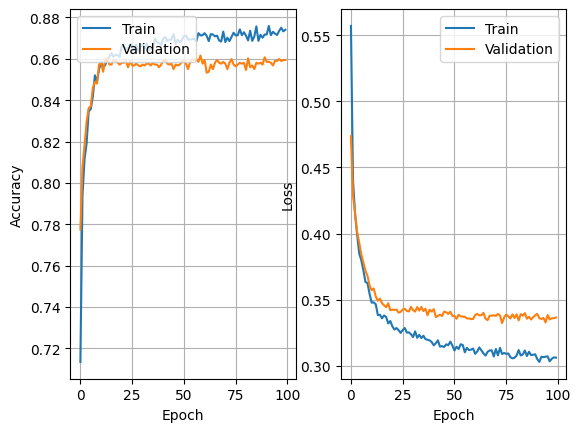

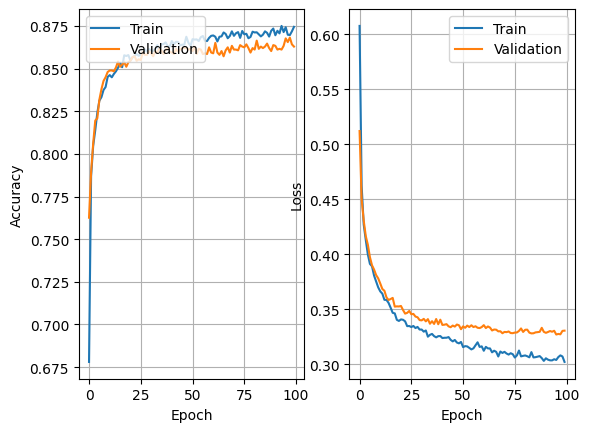

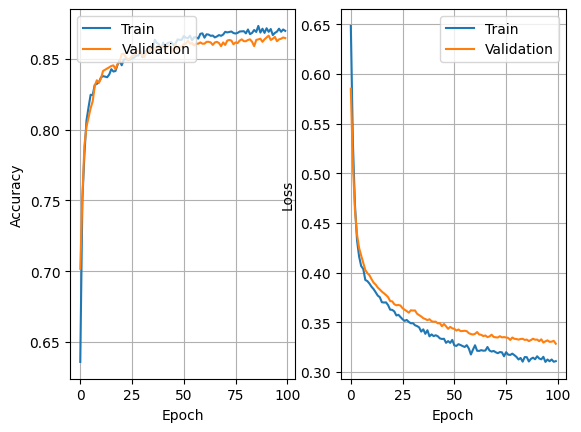

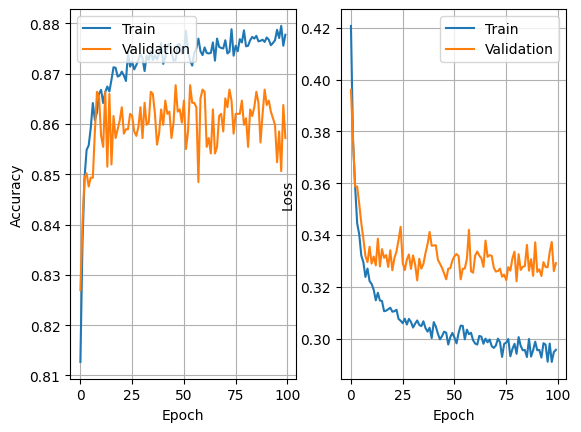

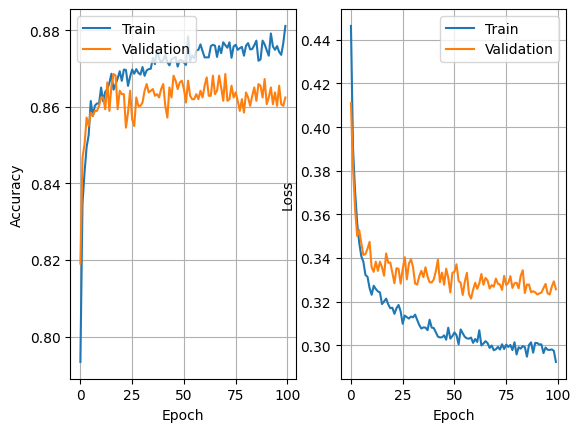

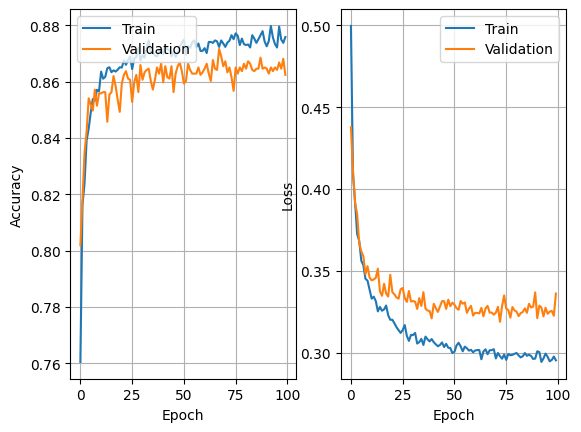

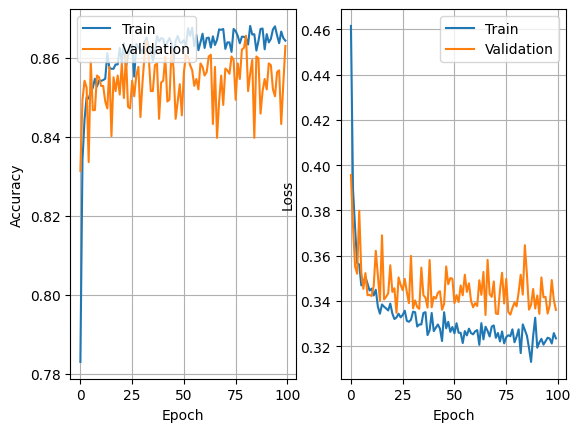

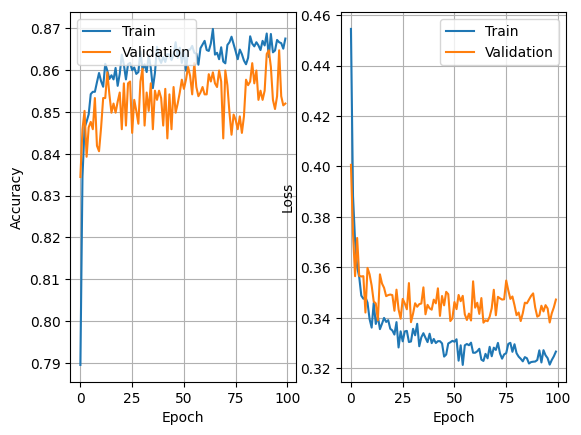

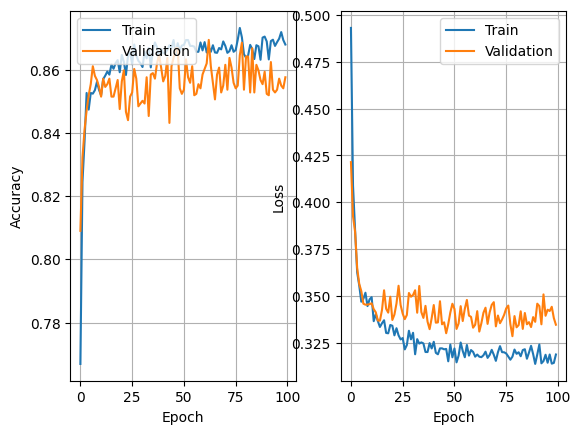

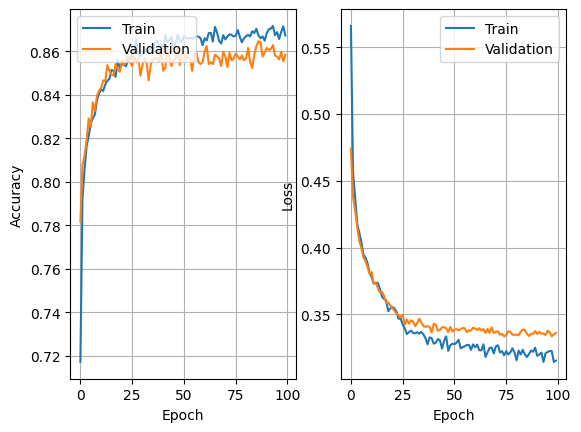

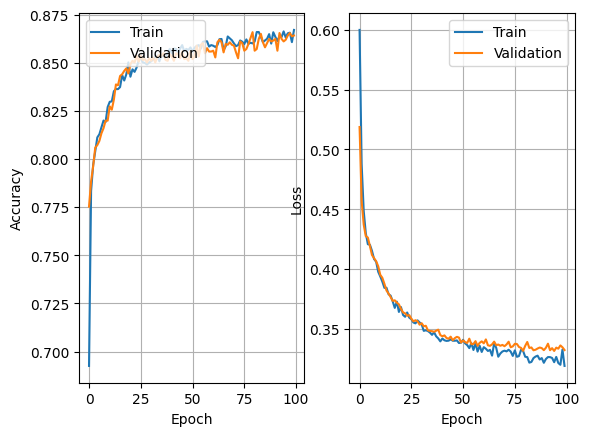

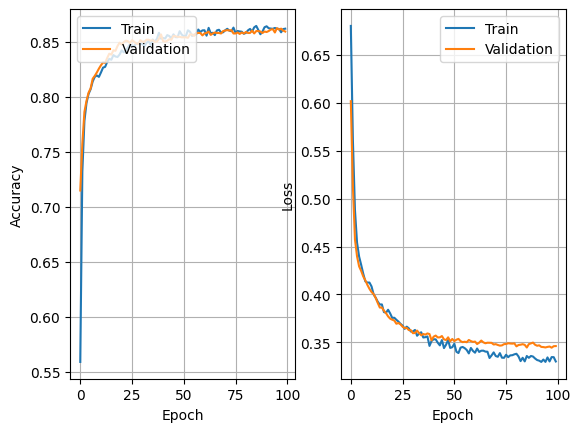

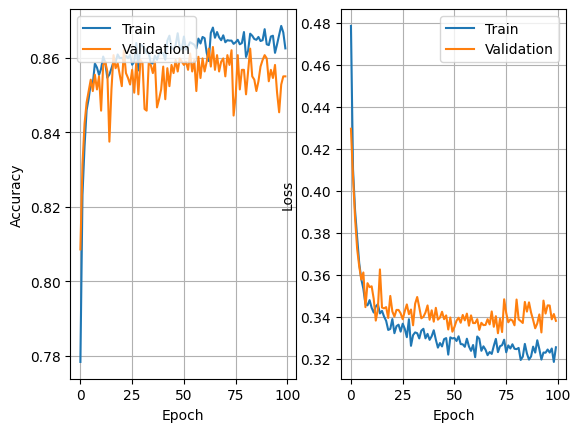

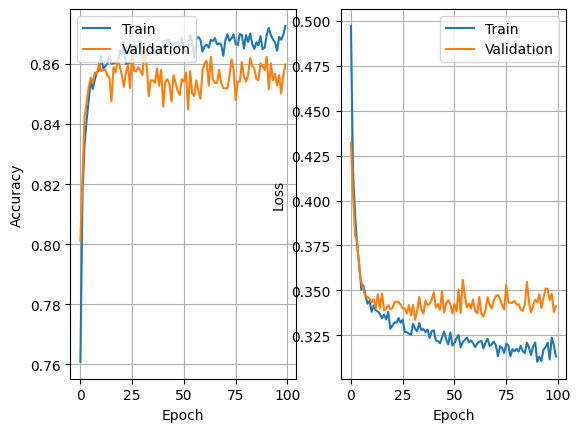

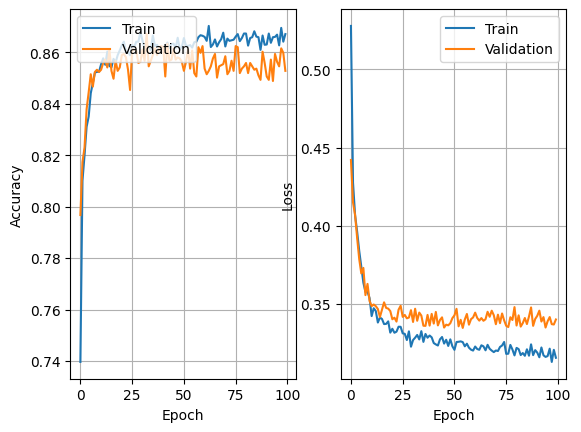

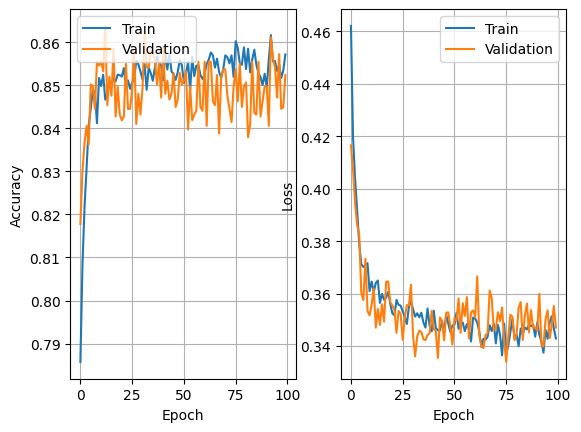

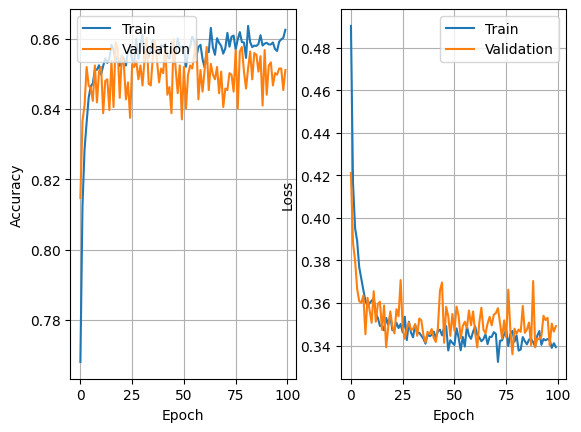

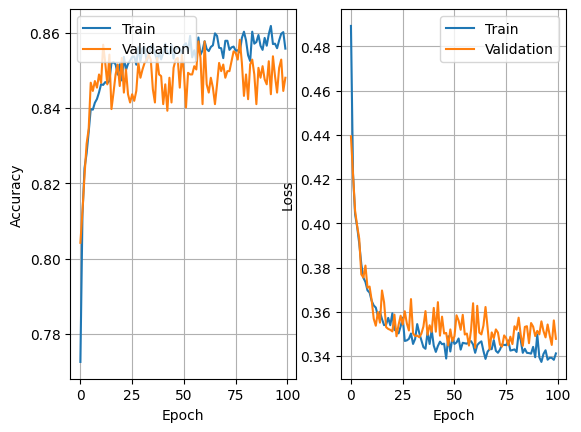

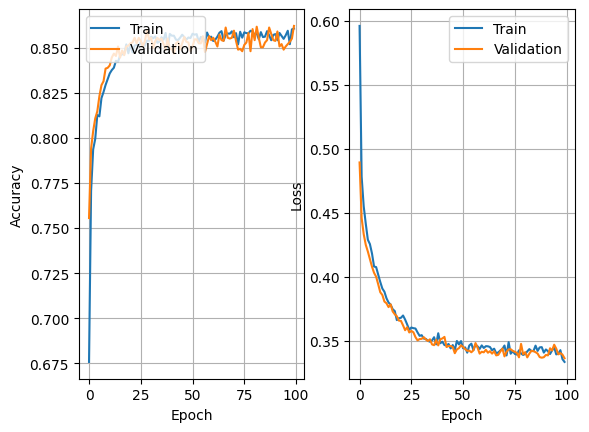

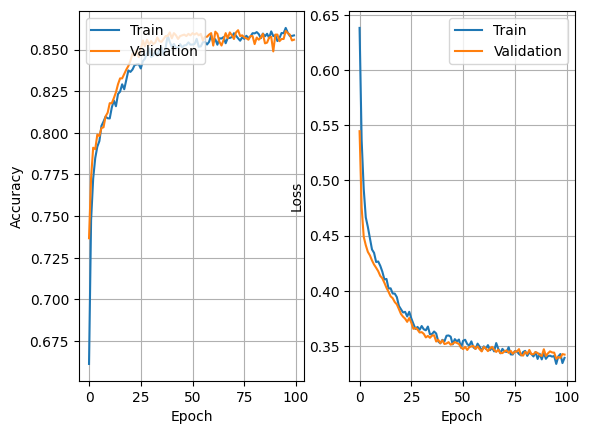

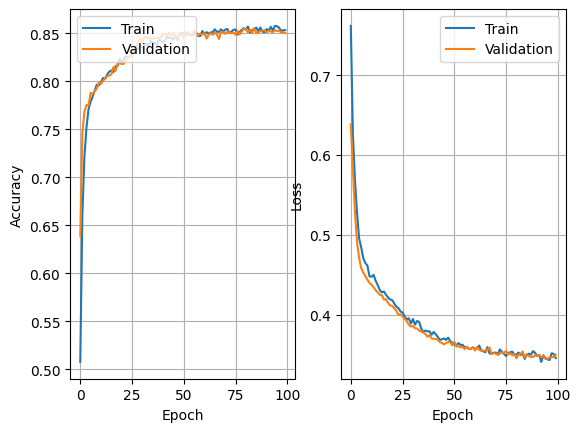

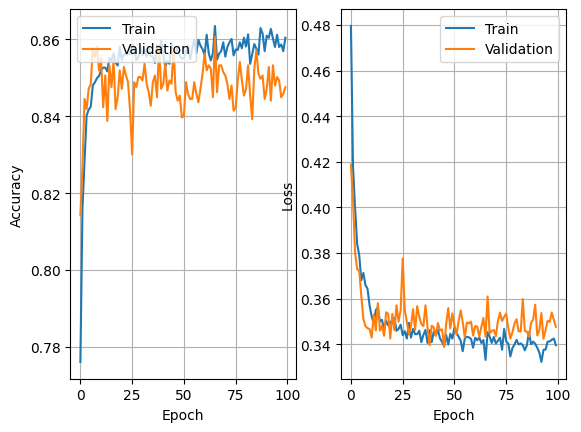

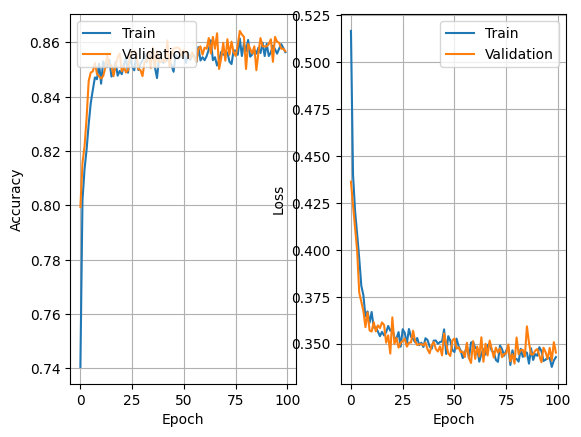

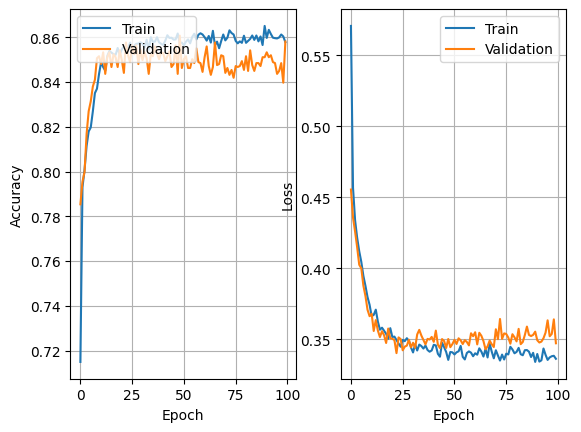

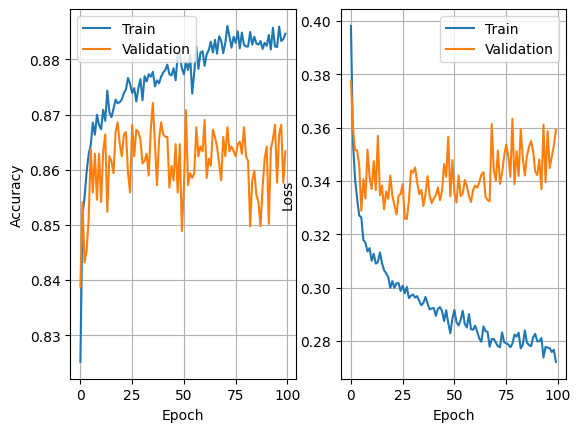

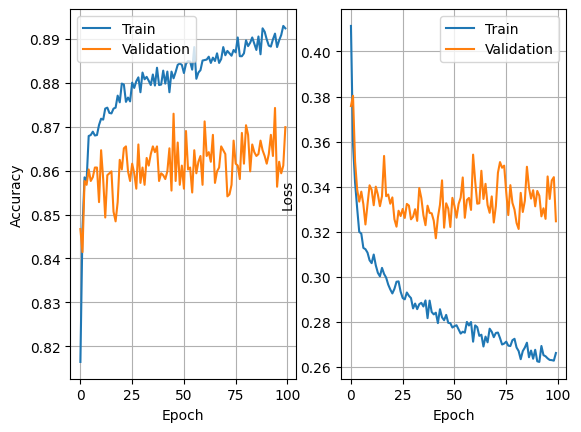

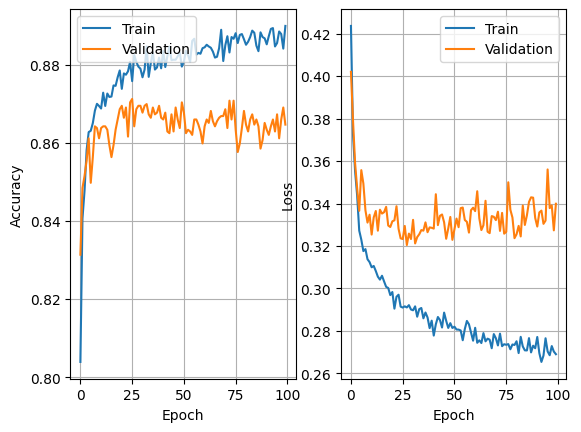

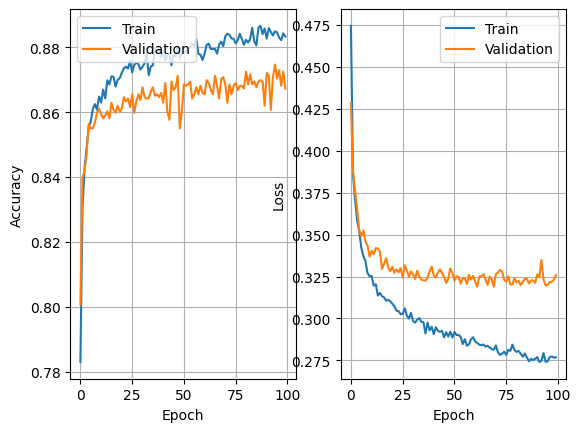

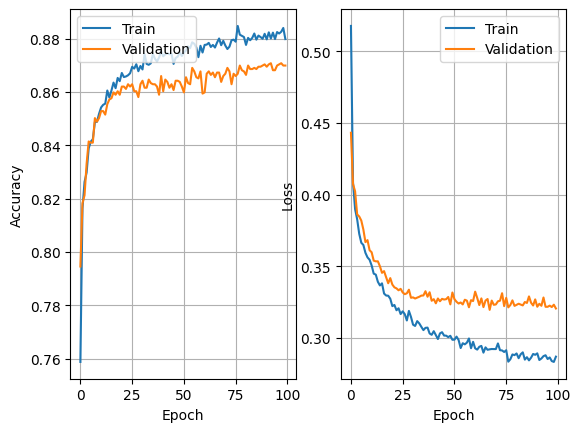

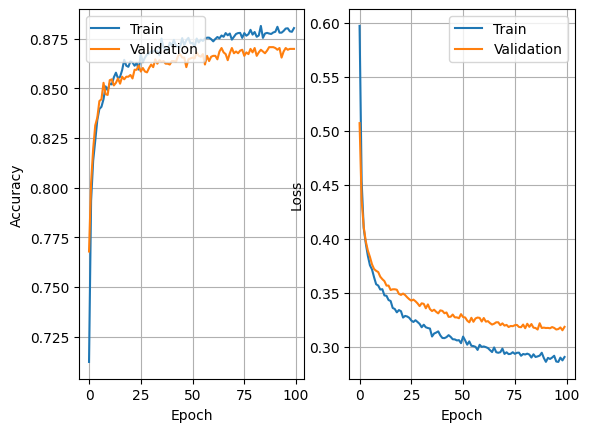

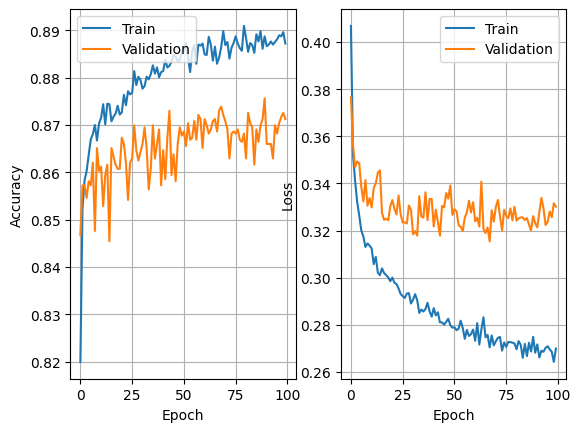

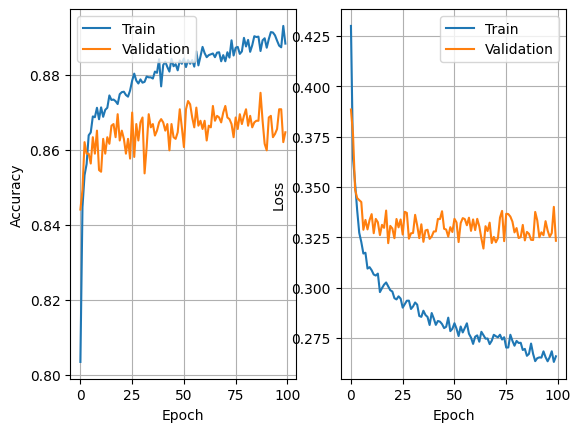

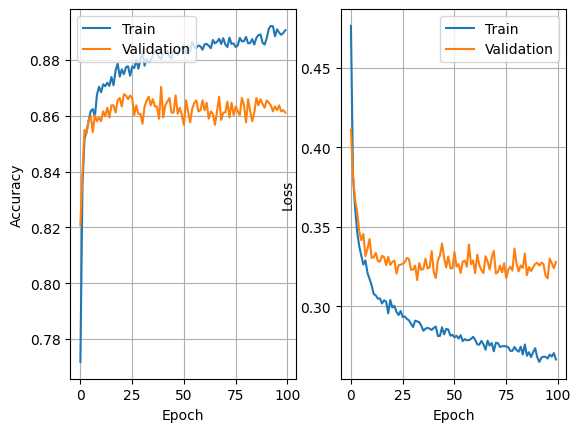

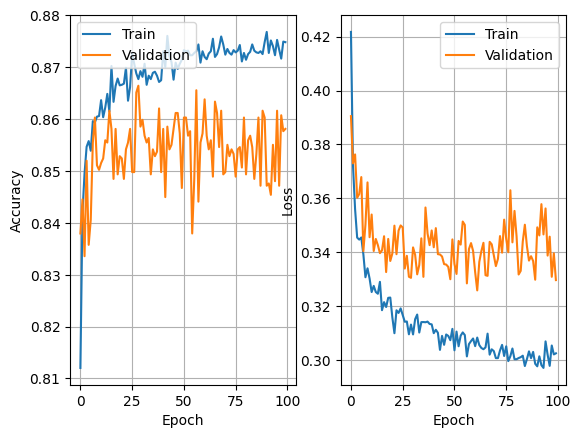

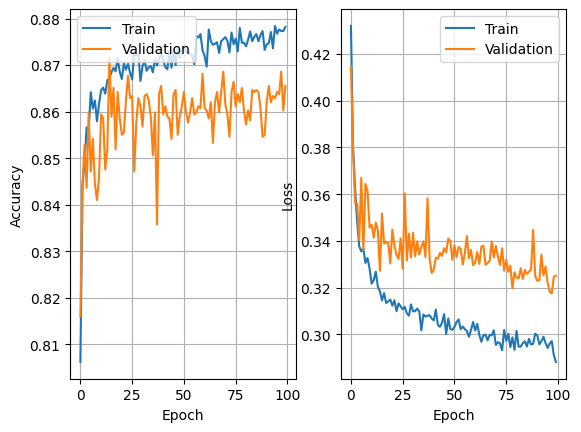

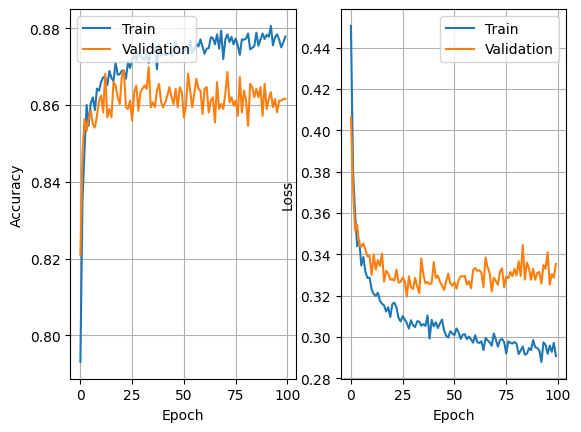

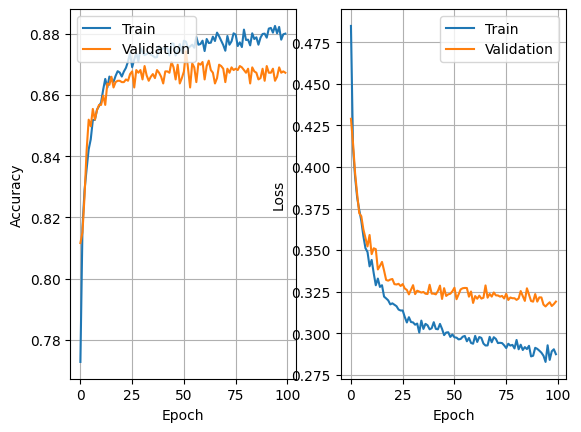

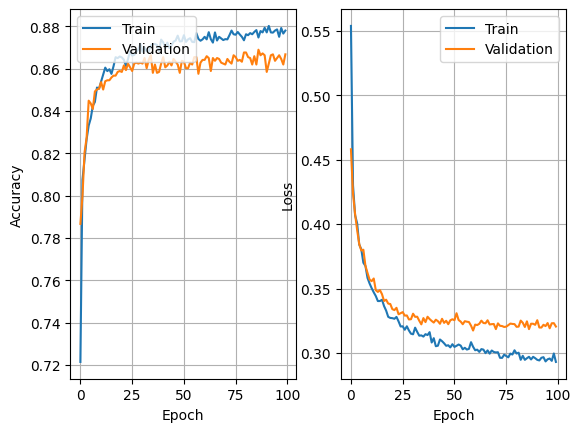

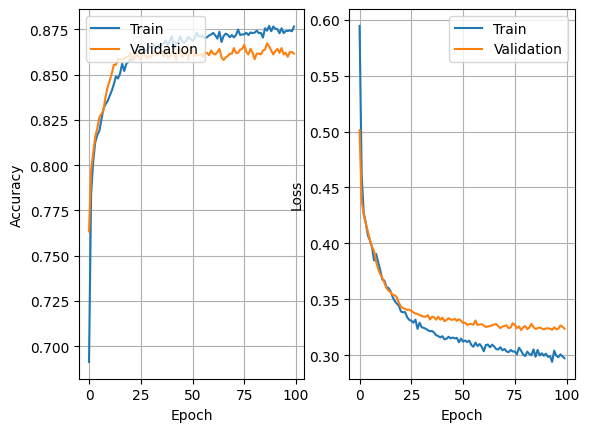

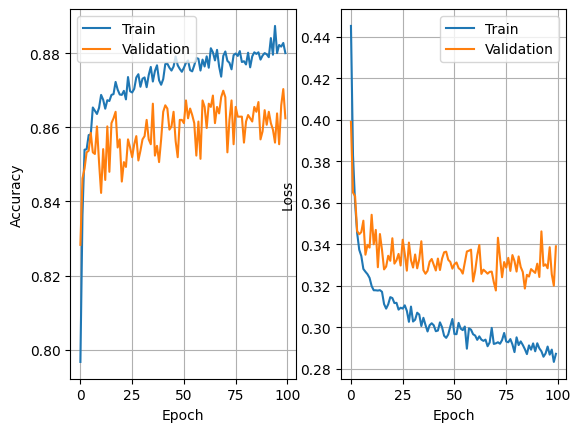

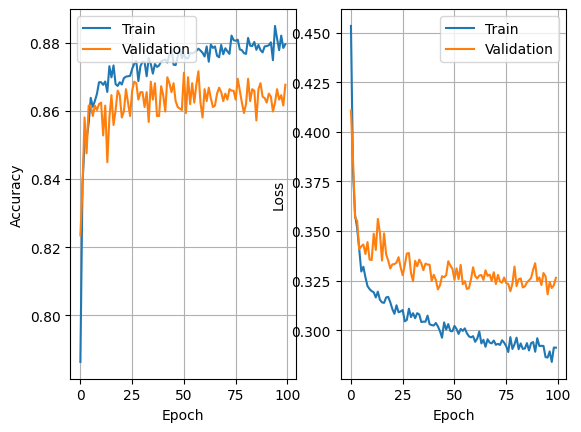

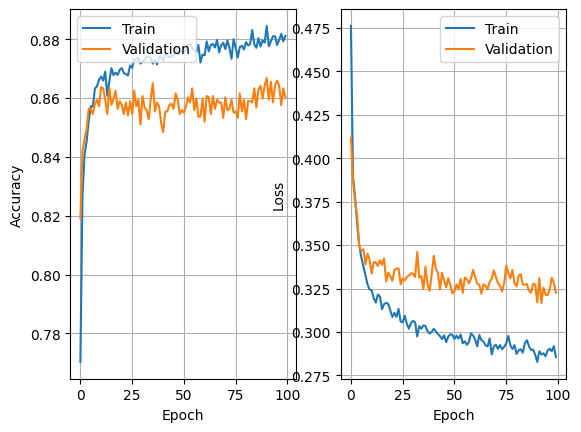

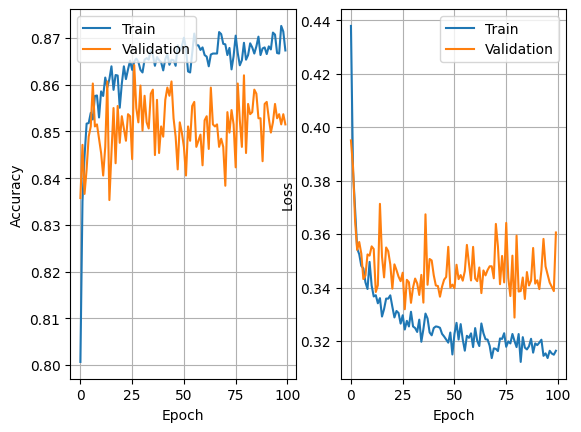

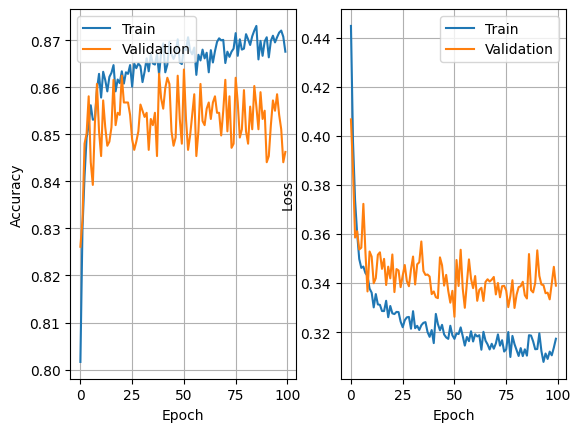

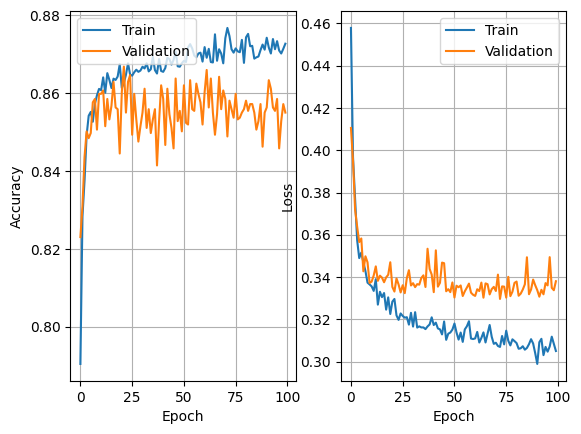

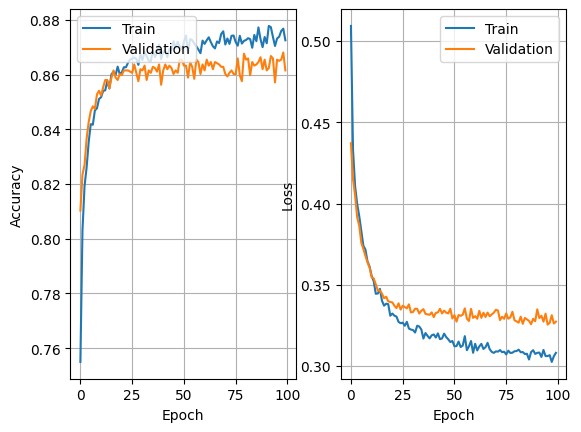

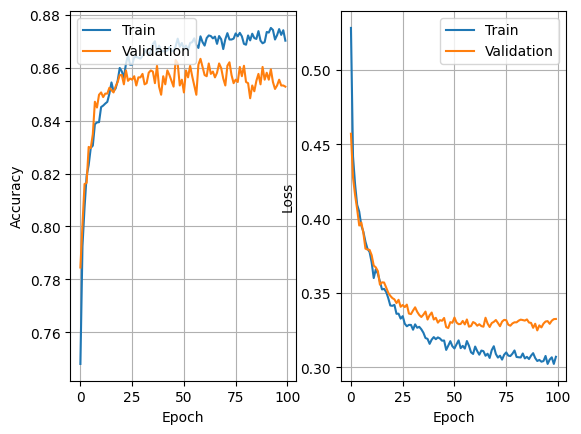

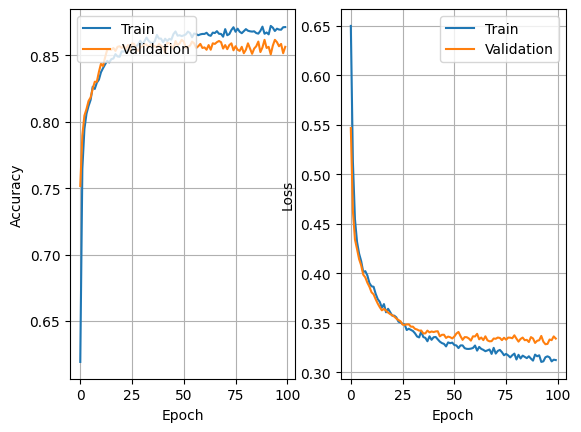

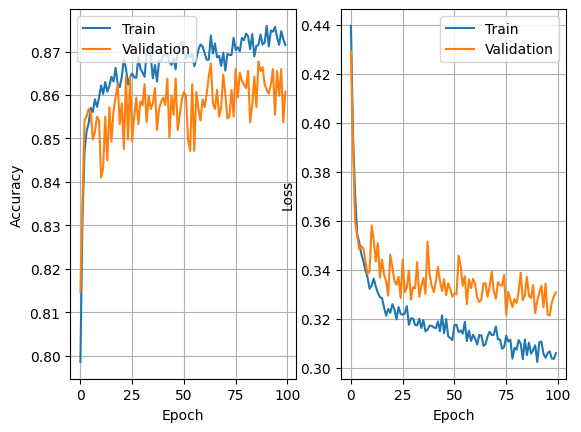

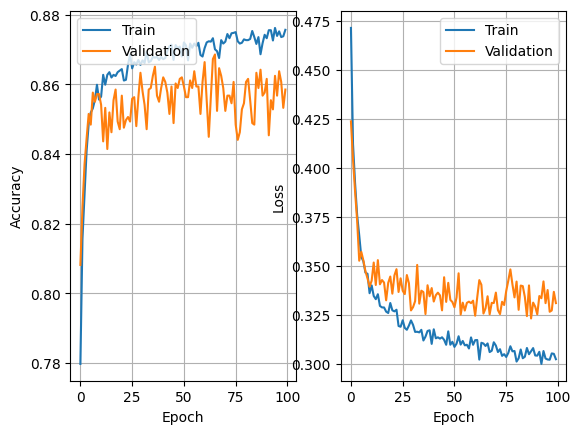

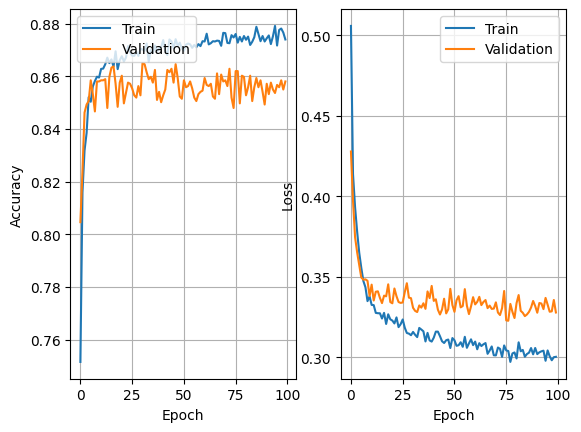

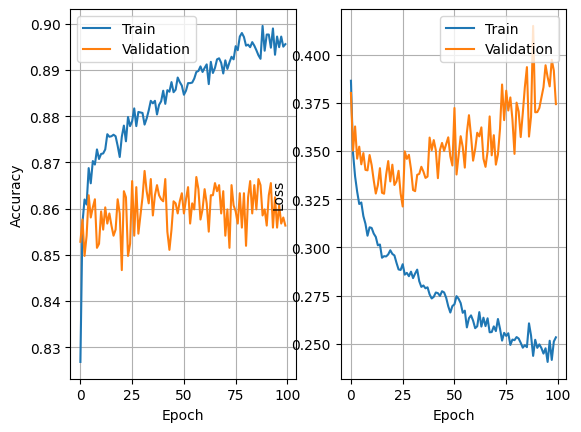

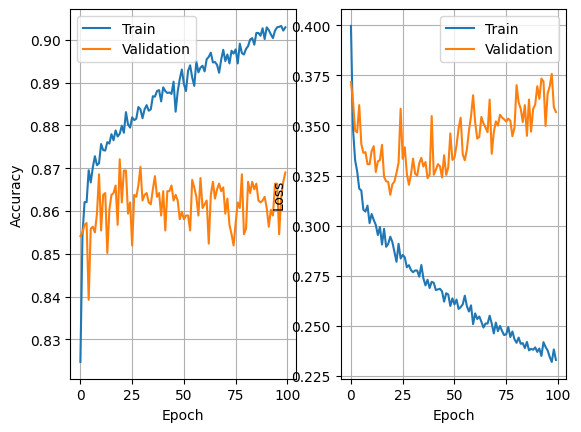

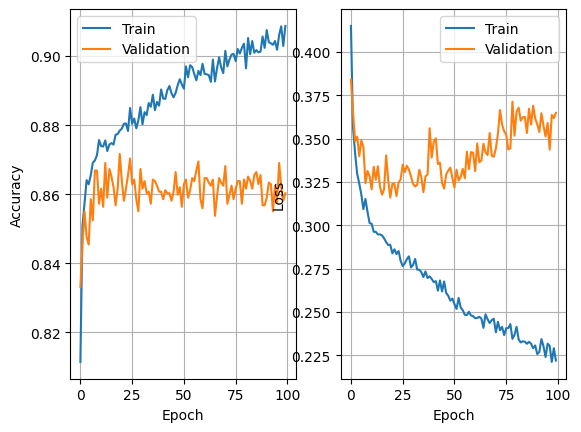

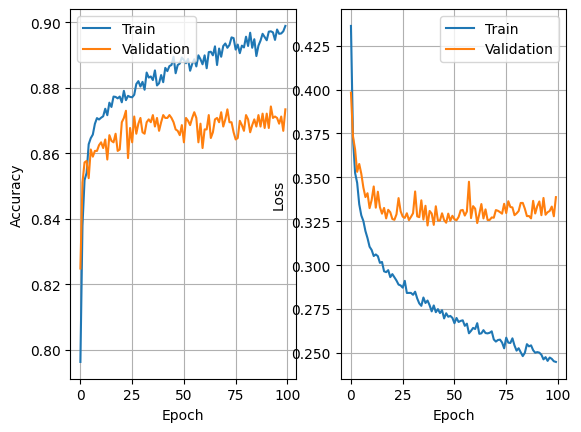

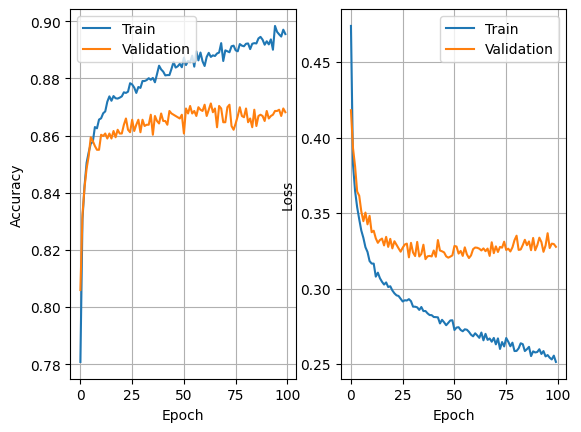

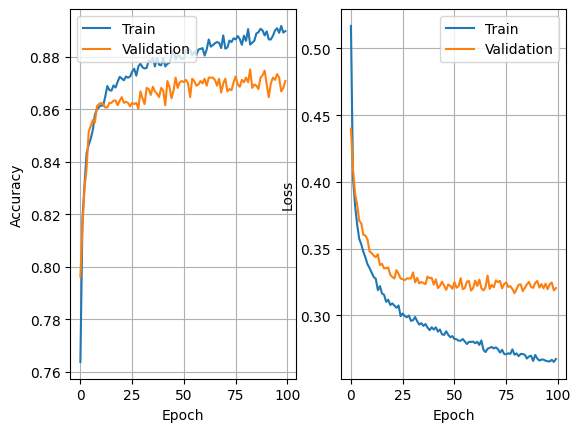

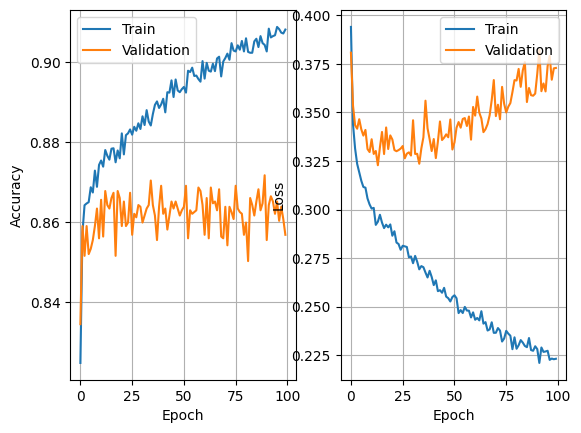

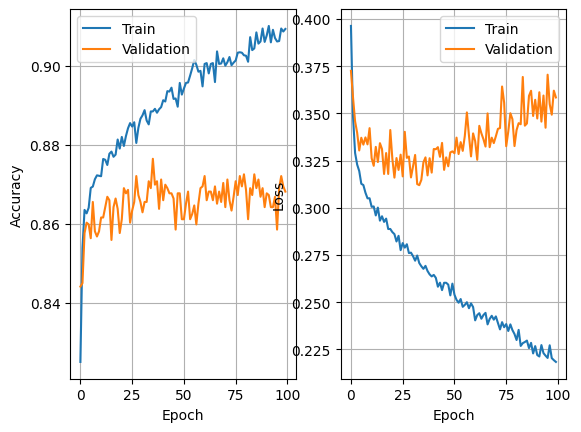

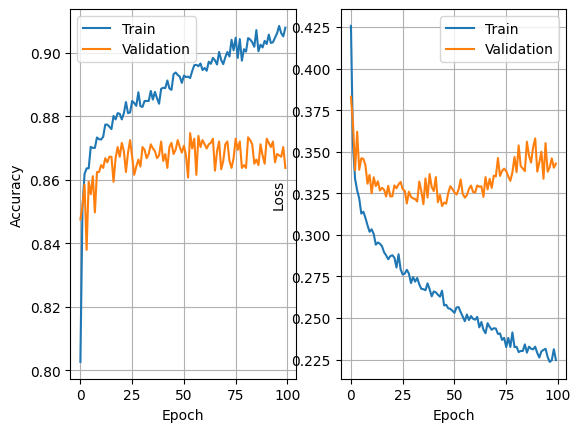

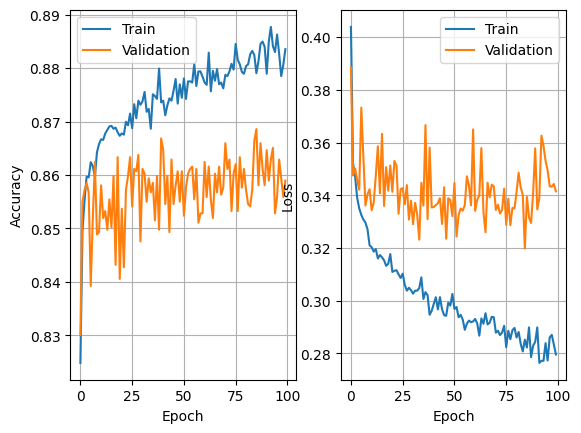

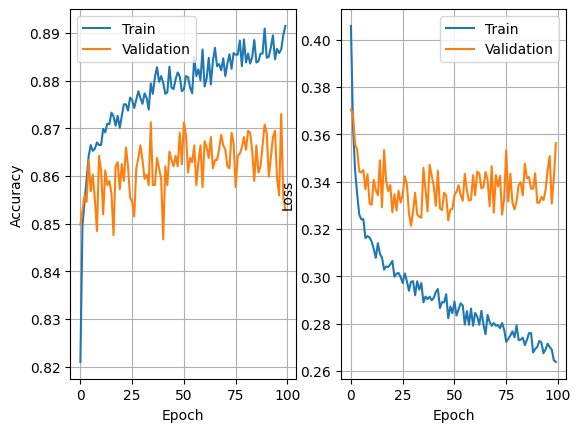

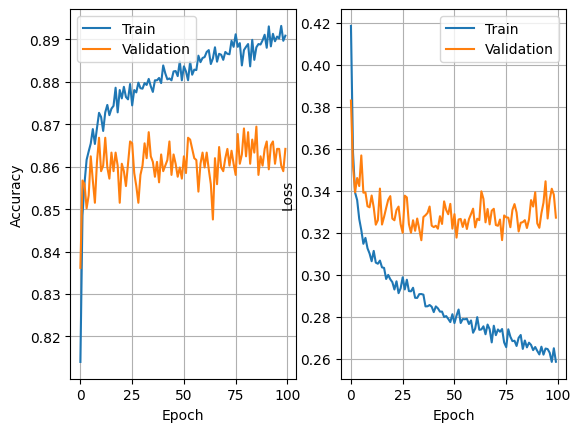

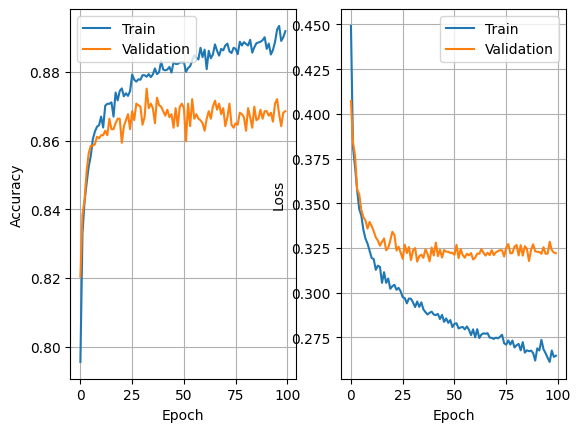

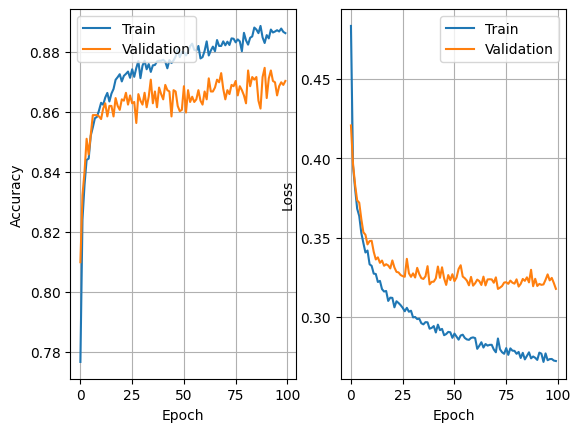

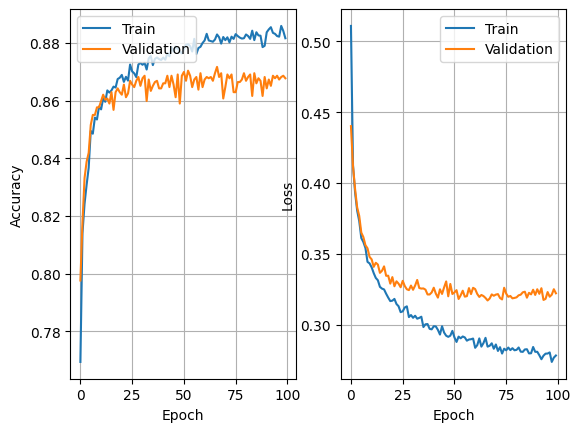

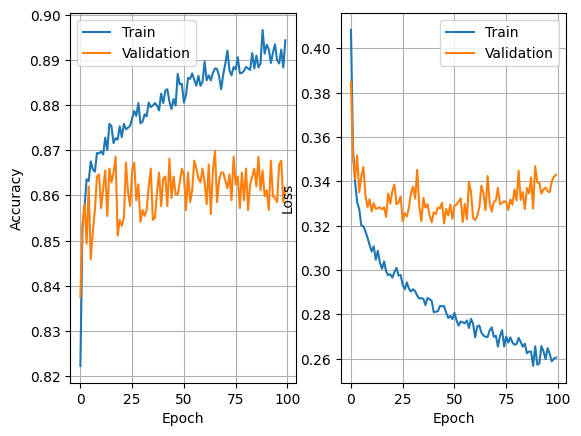

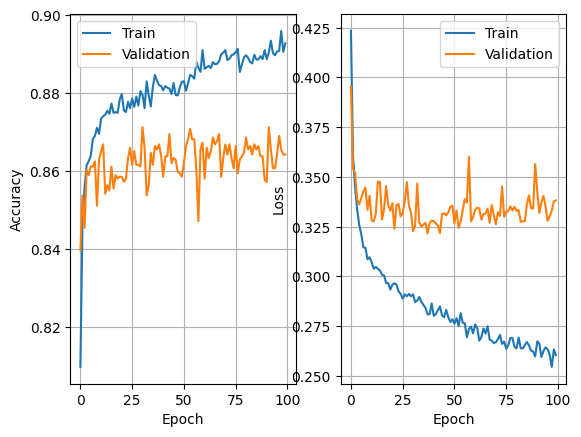

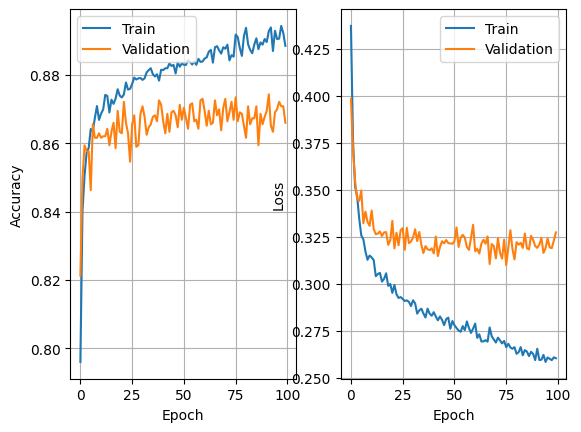

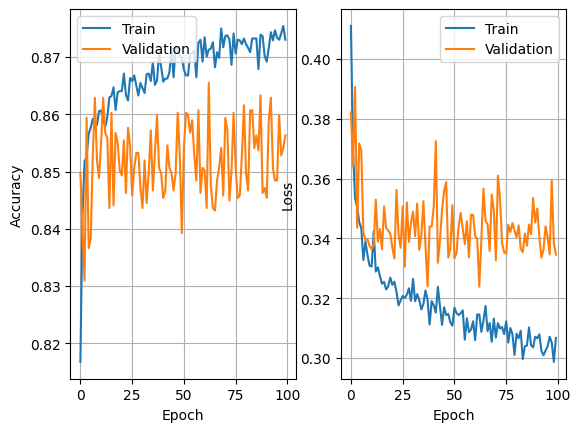

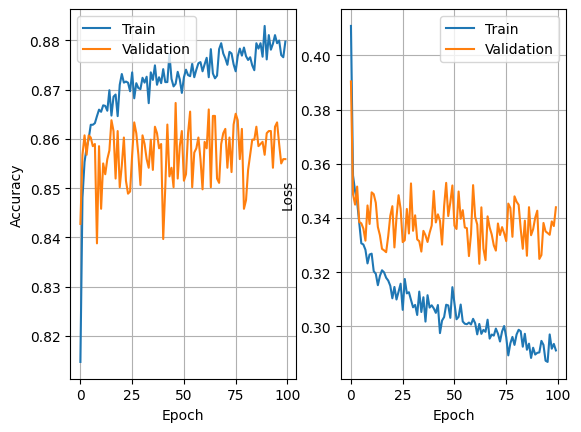

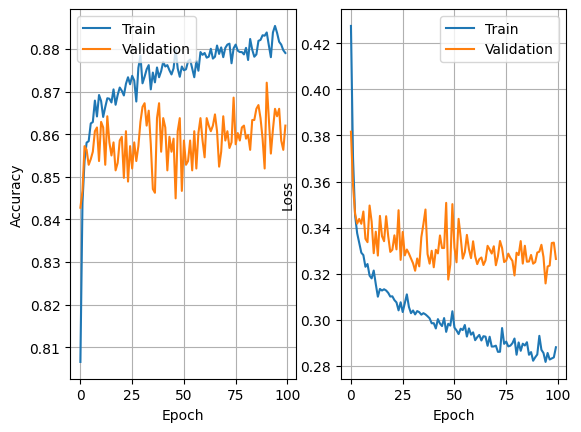

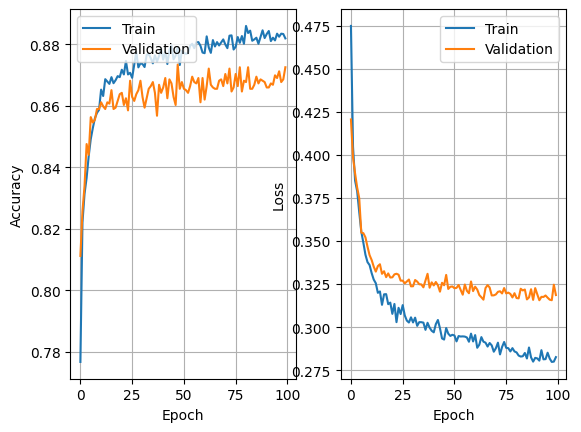

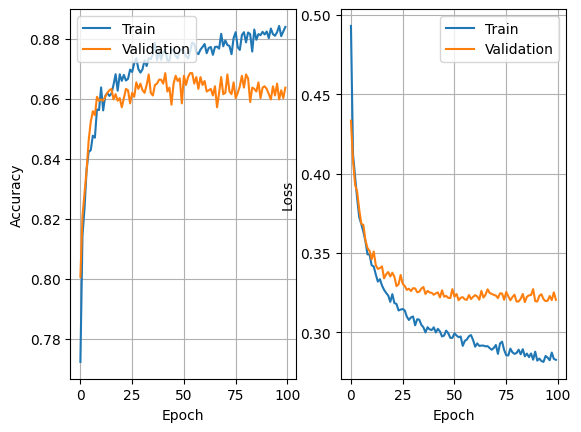

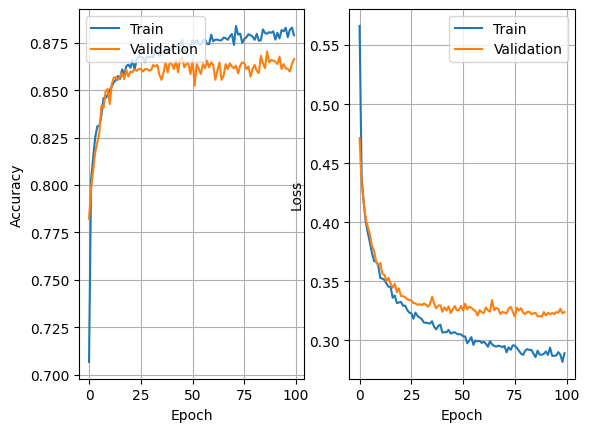

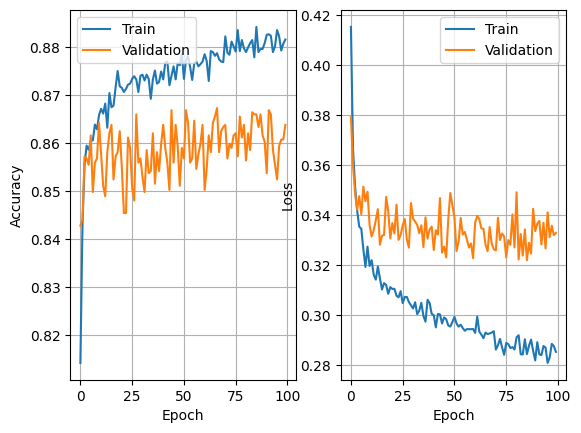

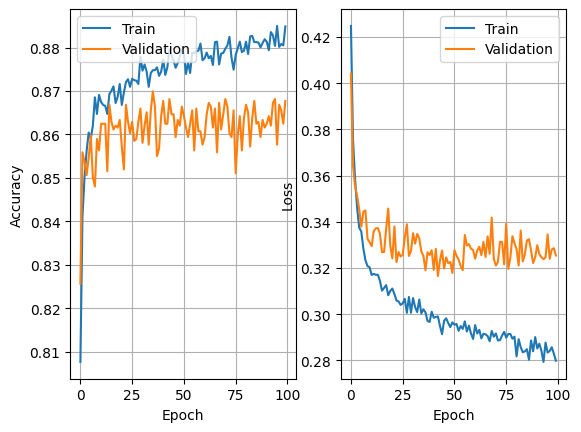

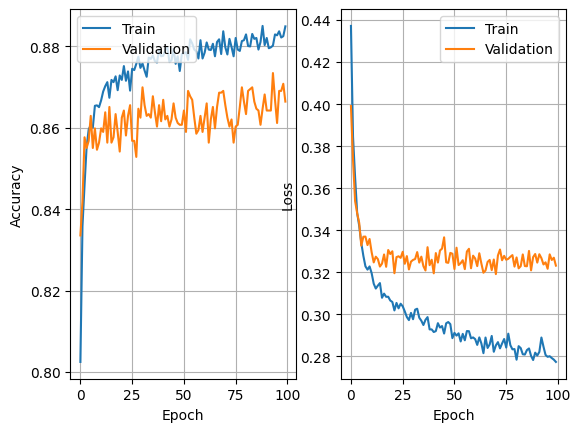

In [60]:
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.1, 0.2, 0.3]:
        for lr in [0.01, 0.001, 0.005]:
            for batch_size in [32, 64, 128]:
                nn_model, history = TrainModel(X_Train, Y_Train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_accuracy(history)